<a href="https://colab.research.google.com/github/hamiin47/OB-session_M/blob/main/Assign_0304.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **chp.4**
## **모델 훈련**

선형 회귀를 훈련시키는 방법
1. 직접 계산할 수 있는 공식을 사용하여 훈련 세트에 가장 잘 맞는 모델 파라미터를 해석적으로 구한다.
2. 경사 하강법(GD)이라 불리는 반복적인 최적화 방식을 사용하여 모델 파라미터를 조금씩 바꾸면서 비용 함수를 훈련 세트에 대해 최소화시킨다.

**4.1**  선형 회귀

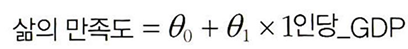

이 모델은 입력 특성인 1인당_GDP에 대한 선형 함수이다.

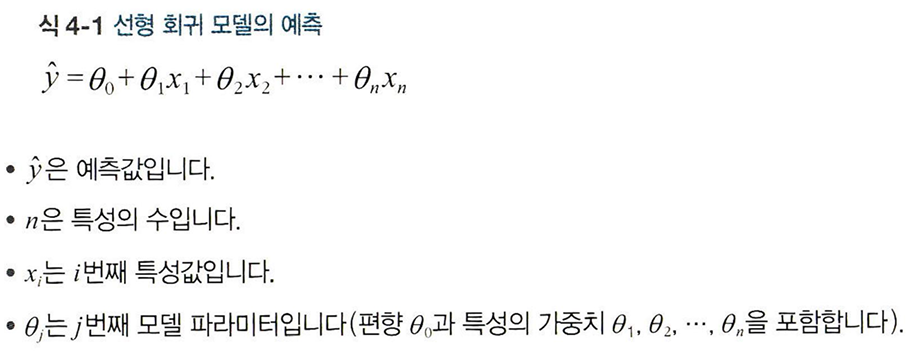
일반적인 선형 모델(가중치 합과 편향이라는 상수를 더해 예측을 만든다.)

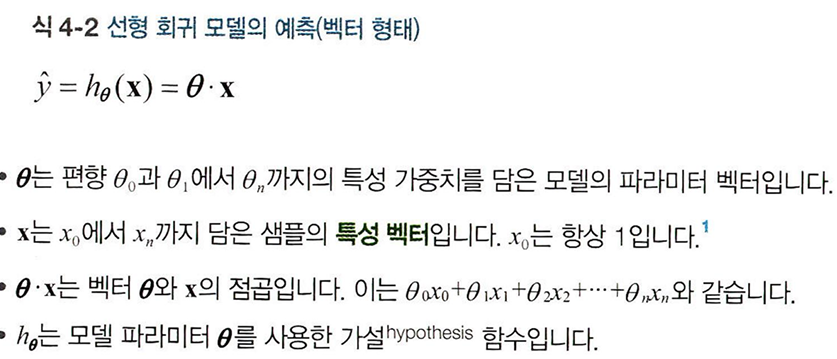



---

**4.1.1** 정규방정식

비용함수를 최소화하는 세타값을 찾기 위한 해석적인 방법이다.

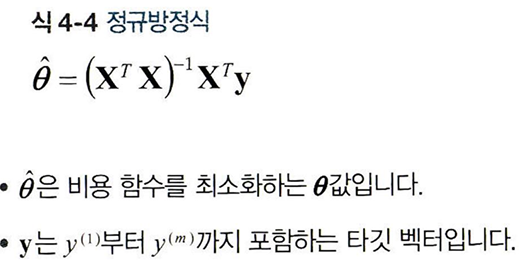

In [1]:
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

In [2]:
X_b = np.c_[np.ones((100,1)), X] #모든 샘플에 x0=1을 추가한다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
theta_best

array([[3.85120306],
       [2.90213877]])

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] #모든 샘플에 x0=1을 추가한다.
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.85120306],
       [9.65548059]])

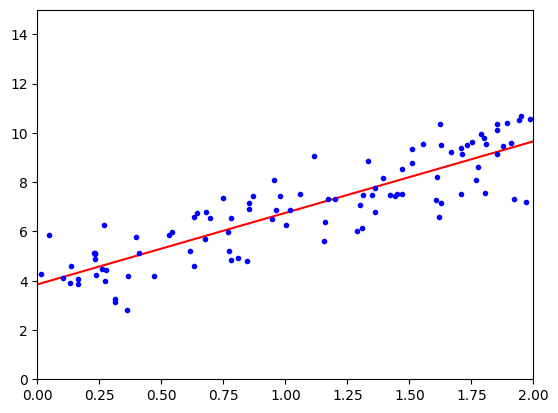

In [5]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [7]:
lin_reg.intercept_, lin_reg.coef_

(array([3.85120306]), array([[2.90213877]]))

In [8]:
lin_reg.predict(X_new)

array([[3.85120306],
       [9.65548059]])

LinearRegression 클래스는 scipy.linalg.lstsq() 함수를 기반으로 한다.

In [9]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.85120306],
       [2.90213877]])

In [10]:
np.linalg.pinv(X_b).dot(y)

array([[3.85120306],
       [2.90213877]])

유사역행렬 자체는 특잇값 분해(SVD)라 부르는 표준 행렬 분해 기법을 사용해 계산된다.

**4.1.2** 계산 복잡도

역행렬을 계산하는 방법이다.

**4.2 경사 하강법(GD)**

경사 하강법은 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘이다.

경사 하강법의 기본 아니디어는 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것이다.

[원리]
- 파라미터 벡터(theta)에 대해 비용 함수의 현재 그레이디언트를 계산한다.
- 그레이디언트가 감소하는 방향으로 진행하고 그레이디언트가 0이면 최솟값에 도달한 것이다.

경사 하강법에서 중요한 파라미터는 스텝의 크기로, 학습률 하이퍼파라미터로 결정된다.

학습률이 너무 작으면 알고리즘이 수렵하기 위해 반복을 많이 진행해야 하므로 시간이 오래 걸린다.

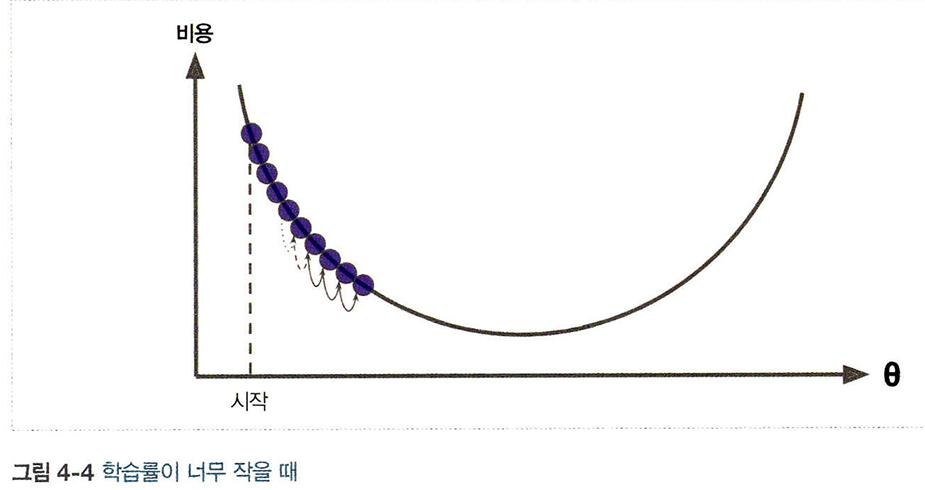

반면, 학습률이 너무 크면 골짜기를 가로질러 반대편으로 건너뛰게 되어 이전보다 더 높은 곳으로 올라가게 될 수도 있다.

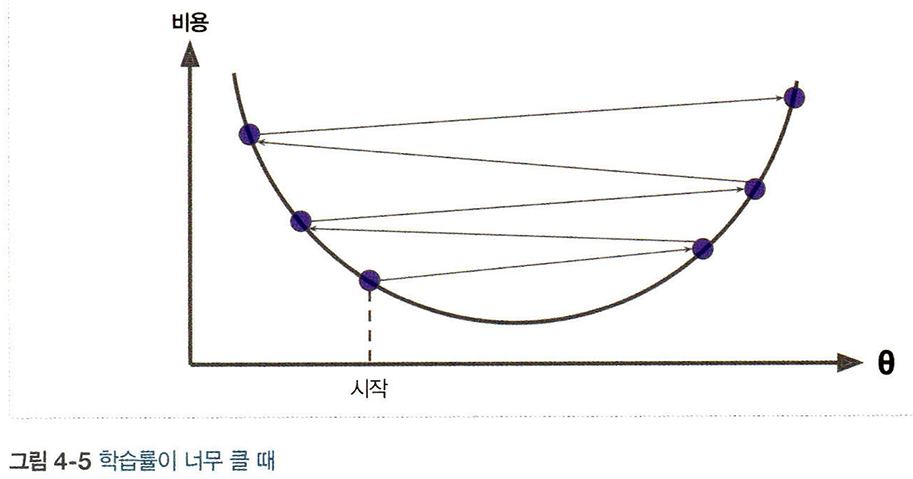

다만 경사 하강법의 문제점은 무작위 초기화 때문에 알고리즘이 왼쪽에서 시작하면 전역 최솟값보다 덜 좋은 지역 최솟값에 수렴한다.

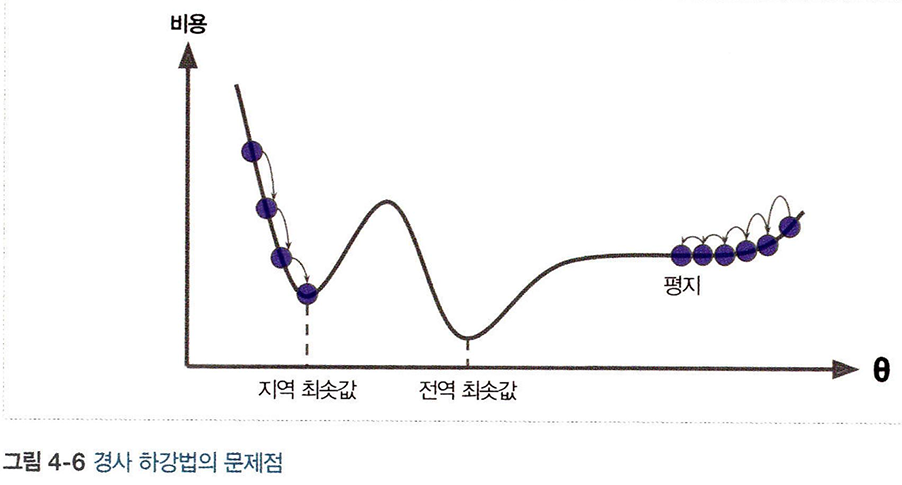

다행히 선형 회귀를 위한 MSE 비용 함수는 곡선에서 어떤 두 점을 선택해 선을 그어도 곡선을 가로지르지 않는 볼록함수이다. => 이는 지역 최솟값이 없고 하나의 전역 최솟값만 존재한다.

**4.2,1** 배치 경사 하강법

경사 하강법을 구현하려면 각 모델 파라미터에 대해 비용 함수의 그레이디언트를 계산해야한다.

가시 말해 파라미터가 조금 변경될 때 비용 함수가 얼마나 바뀌는지 계산해야한다. -> 이를 편도함수라고 한다.

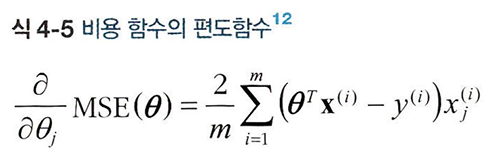

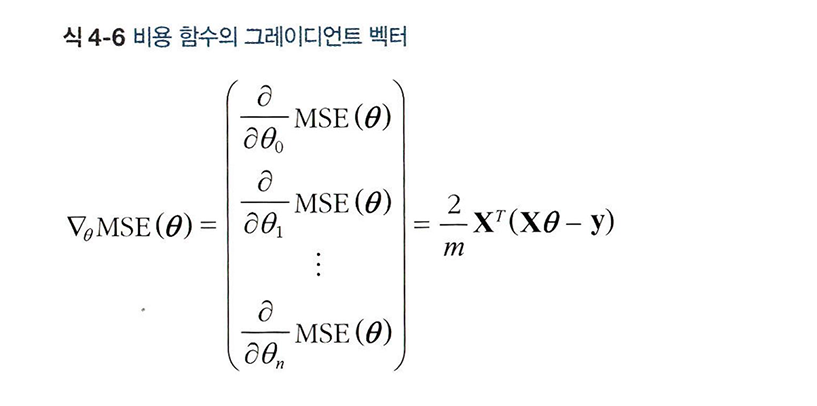

In [11]:
eta = 0.1
n_iterations = 100
m = 100

theta = np.random.randn(2,1) #무작위 초기화

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

In [12]:
theta

array([[3.83875922],
       [2.91194863]])

정규방정식으로 찾은 것과 일치한다.

(= 경사 하강법이 완벽하게 작동하였다.)

학습률 n을 바꿔보면 다음과 같다.

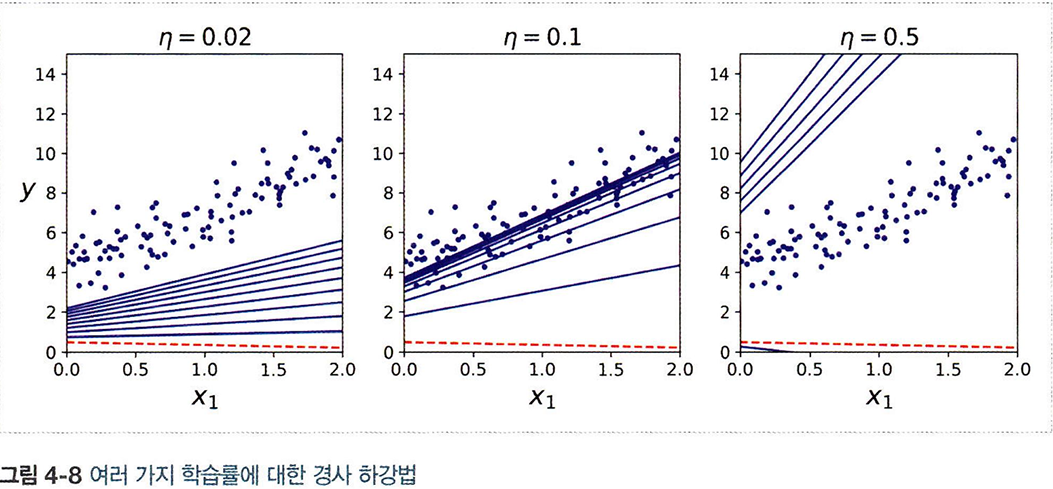

- 왼쪽은 학습률이 너무 낮다.알고리즘은 최적점에 도달하겠지만 시간이 오래 걸릴 것이다.
- 가운데는 학습률이 아주 적당해보인다.반복 몇 번 만에 이미 최적점에 수렴했다.
- 오른쪽은 학습률이 너무 높다. 알고리즘이 이리저리 널뛰면서 스텝마다 최적점에서 점점 더 멀어져 발산한다.

적절한 학습률을 찾으려면 그리드 탐색을 사용한다.하지만 그리드 탐색에서 수렴하는 데 너무 오래 걸리는 모델을 막기 위해 반복 횟수를 제한해야한다.

[반복 횟수 지정 방법]
- 너무 작으면 최적점에 도달하기 전에 알고리즘이 멈추고, 너무 크면 모델 파라미터가 더는 변하지 않는 동안 시간을 낭비하게 된다.
- 즉, 벡테의 노름이 어떤 값(허용오차)보다 자강지면 경사 하강법이 (거의) 최솟값에 도달한 것이므로 알고리즘을 중지하는 것이다.

**4.2.2** 확률적 경사 하강법

배치 하강법의 가장 큰 문제는 매 스텝에서 전체 훈련 세트를 사용해 그레이디언트를 계산한다는 것이다.

이와는 정반대로 확률적 경사 하강법은 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레이디언트를 계산한다.
  - 매 반복에서 다뤄야 할 데이터가 매우 적기 때문에 한 번에 하나의 샘플을 처리하면 알고리즘이 확실히 훨씬 빠르다.

반면에 확률적(=무작위)이기 때문에 이 알고리즘은 배치 경사 하강법보다 훨씬 불안정하다.



In [13]:
n_epochs = 50
t0, t1 = 5, 50 #학습 스케쥴 하이퍼파라미터

def learning_schedule(t) :
  return t0 / (t + t1)

theta = np.random.randn(2,1) # 무작위 초기화

for epoch in range(n_epochs) :
  for i in range(m) :
    random_index = np.random.randint(m)
    xi = X_b[random_index : random_index + 1]
    yi = y[random_index : random_index + 1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta *gradients

In [14]:
theta

array([[3.88308411],
       [2.86190032]])

In [15]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [16]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.80554755]), array([2.89572123]))

**4.2.3** 미니배치 경사 하강법

각 스텝에서 전체 훈련 세트나 하나의 샘플을 기반으로 그레이디언트를 계산하는 것이 아니라 미니배치라 부르는 임의의 작은 샘플 세트에 대해 그레이디언트를 계산한다.

미니배치를 어느 정도 크게 하면 이 알고리즘은 파라미터 공간에서 SGD보다 덜 불규칙하게 움직인다.결국 미니배치 경사 하강법이 SGD보다 최솟값에 더 가까이 도달하게 될 것이다. 하지만 지역 최솟값에서 빠져나오기는 더 힘들다

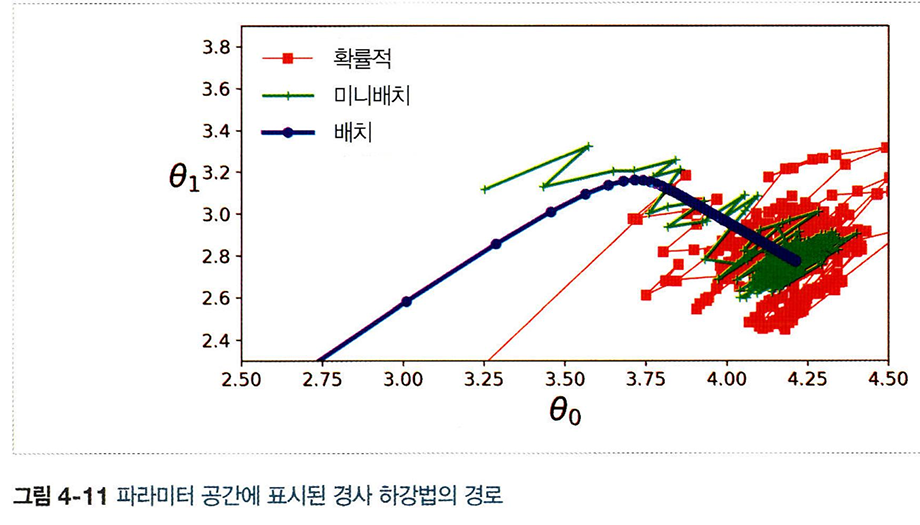


세가지 경사 하강법 알고리즘이 훈련 과정 동안 파라미터 공간에서 움직인 경로이다.

모두 최솟값 근처에 도달했지만 배치 경사 하강법의 경로가 실제로 최솟값에서 멈춘 반면 확률적 경사 하강법과 미니배치 경사 하강법은 근처에서 맴돌고 있다.

**4.3 다항함수**

In [17]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-2.6928354])

In [20]:
X_poly[0]

array([-2.6928354 ,  7.25136251])

In [21]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.01802049]), array([[1.00094565, 0.43822842]]))

**4.4 학습곡선**

고차 다항 회귀를 적용하면 보통의 선형 회귀에서보다 훨씬 더 훈련 데이터에 잘 맞추려 할 것이다

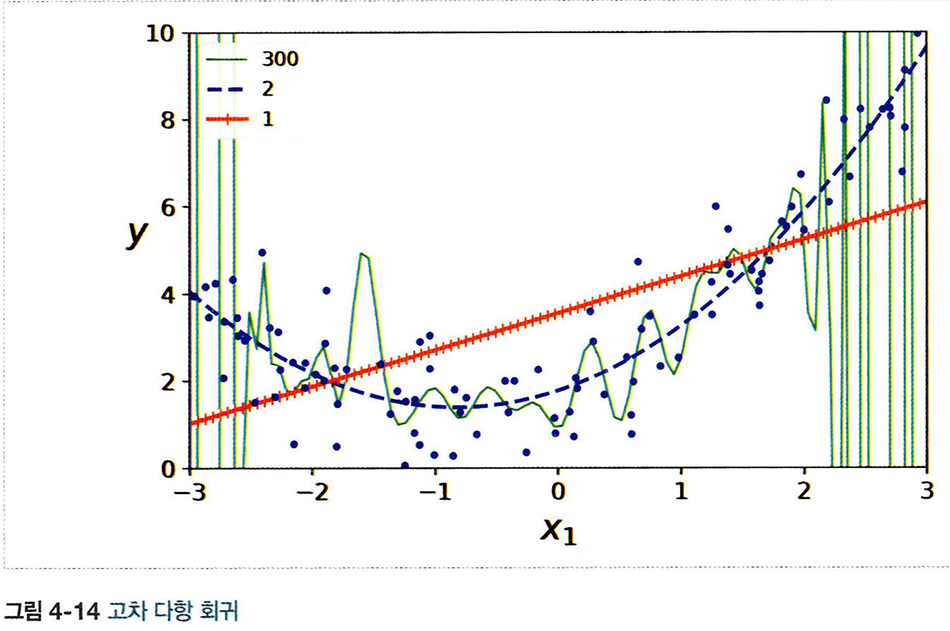

이 고차 다항 회귀 모델은 심각하게 훈련 데이터에 과대적합되었다. 반면에 선형 모델은 과소적합이다. 이 경우 가장 일반화가 잘된 모델은 2차 다항 회귀이다.

1. 모델의 일반화 성능을 추정하기 위해 교차 검증을 사용하여 모델의 상황 확인
2. 학습 곡선 이용

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="훈련세트")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="검증세트")

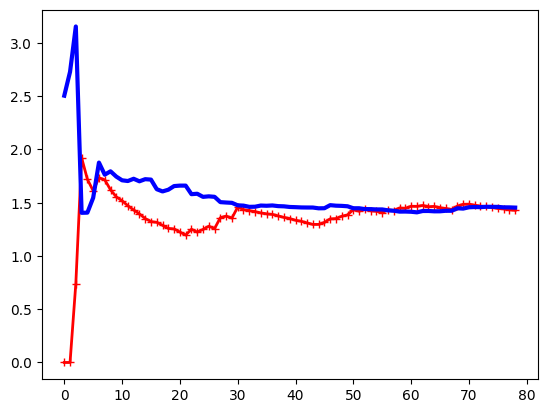

In [23]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

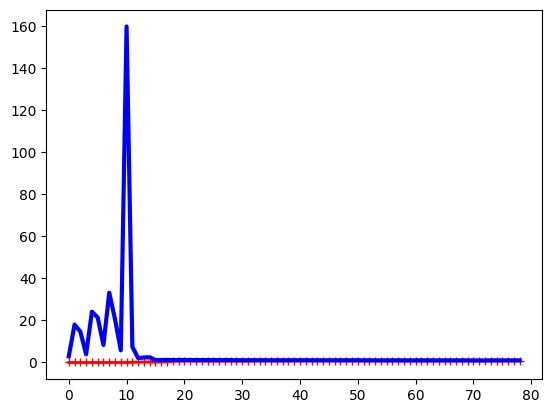

In [24]:
#10차 다항 회귀 모델의 학습 곡선
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

두 학습 곡선은 이전과 비슷해 보이지만 두 가지 중요한 차이점이 있다.

1. 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮다.
2. 두 곡선 사이에는 공간이 있다.

=> 이는 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낫다는 뜻이고, 과대적합 모델의 특징이다. 그러나 더 큰 훈련 세트를 사용하면 두 곡선이 점점 가까워진다.